# Python数据科学101

## 1. 配置系统

- Python
- JDK
- 创建`C:\Hadoop\bin`
- 在这里下载windows版的hadoop https://github.com/steveloughran/winutils 拷贝winutils到`C:\Hadoop\bin`下面
- 创建`HADOOP_HOME`环境变量，指向`C:\Hadoop`
- 创建`C:\temp\hive`文件夹
- 运行`c:\hadoop\bin\winutils chmod 777 \temp\hive`
- 下载Spark: https://spark.apache.org/downloads.html
- 解压下载的Spark的文件到`C:\SPARK`目录下，其它操作系统的放到`home`目录
- 创建`SPARK_HOME`，指向`C:\SPARK`
- 运行`c:\spark\bin\spark-shell`看看是否安装成功

## 2. 使用Python 

- 安装Anaconda
- 检查conda: `conda --version`
- 检查安装的包: `conda list`
- 升级: `conda update conda`

## 3. 实验环境

输入`jupyter notebook`

Text(0.5,1,'Sine wave')

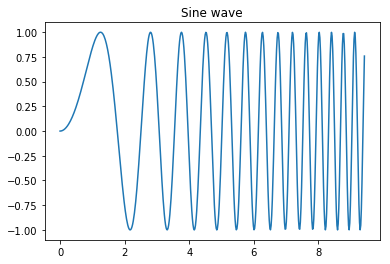

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 3*np.pi, 500)
plt.plot(x, np.sin(x**2))
plt.title('Sine wave')

## 4. Pandas简介

最重要的是`DataFrame`和`Series`

In [2]:
import numpy as np
import pandas as pd

### 4.1 Series

创建一个series，包含空值NaN

In [3]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s[4] # 6.0

6.0

### 4.2 Dataframes

In [4]:
df = pd.DataFrame({'data': ['2016-01-01', '2016-01-02', '2016-01-03'], 'qty': [20, 30, 40]})
df

,data,qty
0,2016-01-01,20
1,2016-01-02,30
2,2016-01-03,40


更大的数据应当从文件里获取

In [5]:
rain = pd.read_csv('data/rainfall/rainfall.csv')
rain

,City,Month,Rainfall
0,San Francisco,Jan,10.0
1,Seattle,Jan,30.0
2,Los Angeles,Jan,2.0
3,Seattle,Feb,20.0
4,San Francisco,Feb,4.0
5,Los Angeles,Feb,0.0
6,Seattle,Mar,22.0
7,San Francisco,Mar,4.0
8,Los Angeles,Mar,NaN
9,Seattle,Apr,NaN


In [6]:
# 加载一列
rain['City']

0     San Francisco
1           Seattle
2       Los Angeles
3           Seattle
4     San Francisco
5       Los Angeles
6           Seattle
7     San Francisco
8       Los Angeles
9           Seattle
10    San Francisco
11      Los Angeles
Name: City, dtype: object

In [7]:
# 加载一行(第二行)
rain.loc[[1]]

,City,Month,Rainfall
1,Seattle,Jan,30.0


In [8]:
# 第一行和第二行
rain.loc[0:1]

,City,Month,Rainfall
0,San Francisco,Jan,10.0
1,Seattle,Jan,30.0


### 4.3 过滤

In [10]:
# 查找所有降雨量小于10的数据
rain[rain['Rainfall'] < 10]

,City,Month,Rainfall
2,Los Angeles,Jan,2.0
4,San Francisco,Feb,4.0
5,Los Angeles,Feb,0.0
7,San Francisco,Mar,4.0
10,San Francisco,Apr,5.0
11,Los Angeles,Apr,4.0


查找4月份的降雨

In [11]:
rain[rain['Month'] == 'Apr']

,City,Month,Rainfall
9,Seattle,Apr,NaN
10,San Francisco,Apr,5.0
11,Los Angeles,Apr,4.0


查找Los Angeles的数据

In [12]:
rain[rain['City'] == 'Los Angeles']

,City,Month,Rainfall
2,Los Angeles,Jan,2.0
5,Los Angeles,Feb,0.0
8,Los Angeles,Mar,NaN
11,Los Angeles,Apr,4.0


### 4.4 给行起名(Naming Rows)

In [13]:
rain = rain.set_index(rain['City'] + rain['Month'])

注意，当我们修改dataframe时，其实是在创建一个副本，因此要把这个值再赋值给原有的dataframe

In [14]:
rain.loc['San FranciscoApr']

City        San Francisco
Month                 Apr
Rainfall                5
Name: San FranciscoApr, dtype: object

## 5. Pandas 例子

In [15]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
df = pd.read_csv('data/nycflights13/flights.csv.gz')

In [17]:
df

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00
5,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,2013-01-01 05:00:00
6,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,507,N516JB,EWR,FLL,158.0,1065,6,0,2013-01-01 06:00:00
7,2013,1,1,557.0,600,-3.0,709.0,723,-14.0,EV,5708,N829AS,LGA,IAD,53.0,229,6,0,2013-01-01 06:00:00
8,2013,1,1,557.0,600,-3.0,838.0,846,-8.0,B6,79,N593JB,JFK,MCO,140.0,944,6,0,2013-01-01 06:00:00
9,2013,1,1,558.0,600,-2.0,753.0,745,8.0,AA,301,N3ALAA,LGA,ORD,138.0,733,6,0,2013-01-01 06:00:00


这里我们主要关注统计数据和可视化。我们来看一下按月统计的晚点时间的均值。

In [18]:
mean_delay_by_month = df.groupby(['month'])['arr_delay'].mean()
mean_delay_by_month

month
1      6.129972
2      5.613019
3      5.807577
4     11.176063
5      3.521509
6     16.481330
7     16.711307
8      6.040652
9     -4.018364
10    -0.167063
11     0.461347
12    14.870355
Name: arr_delay, dtype: float64

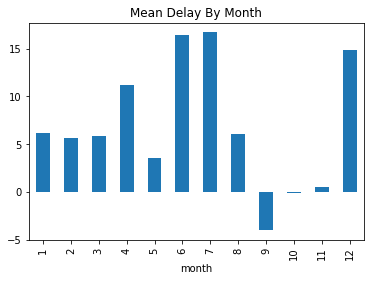

In [19]:
mean_month_plt = mean_delay_by_month.plot(kind='bar', title='Mean Delay By Month')
mean_month_plt

注意，这里9、10月均值会有负值。

Flights to Chicago (ORD)
month
1      7.287694
2      3.680794
3     -2.702473
4     19.179352
5      7.938280
6     13.299376
7      8.405514
8      4.256851
9     -4.745370
10    -1.597090
11     2.071058
12    16.462817
Name: arr_delay, dtype: float64


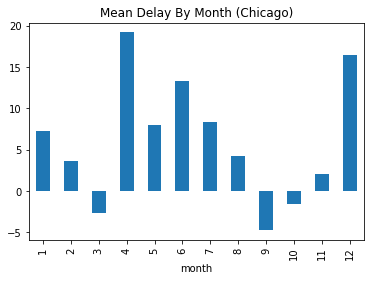

In [20]:
mean_delay_by_month_ord = df[(df.dest == 'ORD')].groupby(['month'])['arr_delay'].mean()
print("Flights to Chicago (ORD)")
print(mean_delay_by_month_ord)

mean_month_plt_ord = mean_delay_by_month_ord.plot(kind='bar', title="Mean Delay By Month (Chicago)")
mean_month_plt_ord

Flights to Chicago (LAX)
month
1     -4.160312
2     -7.601824
3     -5.280928
4      3.085153
5     -7.150657
6     13.007027
7      8.191432
8      1.028667
9     -8.719044
10    -1.205694
11    -0.103290
12    10.724460
Name: arr_delay, dtype: float64


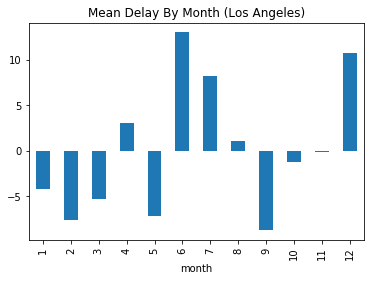

In [21]:
# 再看看Los Angeles进行比较一下
mean_delay_by_month_lax = df[(df.dest == 'LAX')].groupby(['month'])['arr_delay'].mean()
print("Flights to Chicago (LAX)")
print(mean_delay_by_month_lax)

mean_month_plt_lax = mean_delay_by_month_lax.plot(kind='bar', title="Mean Delay By Month (Los Angeles)")
mean_month_plt_lax

从上面的图表中我们可以直观的看到一些特征。现在我们再来看看每个航空公司晚点的情况，并进行一些可视化。

Text(0.5,1,'Average Departure Delay by Carrier in 2008, All airports')

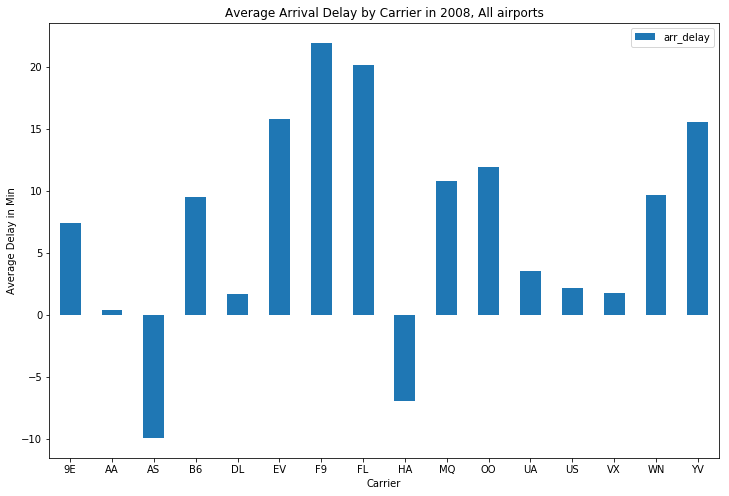

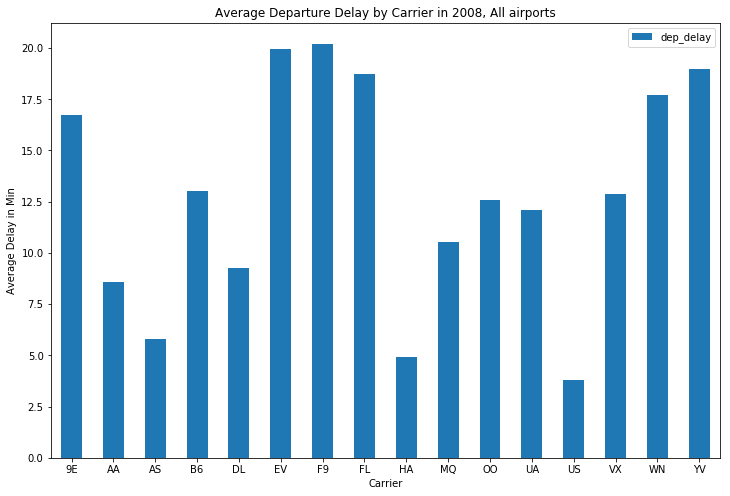

In [22]:
# 看看是否不同的航空公司对晚点会有不同的影响
df[['carrier', 'arr_delay']].groupby('carrier').mean().plot(kind='bar', figsize=(12, 8))
plt.xticks(rotation=0)
plt.xlabel('Carrier')
plt.ylabel('Average Delay in Min')
plt.title('Average Arrival Delay by Carrier in 2008, All airports')

df[['carrier', 'dep_delay']].groupby('carrier').mean().plot(kind='bar', figsize=(12, 8))
plt.xticks(rotation=0)
plt.xlabel('Carrier')
plt.ylabel('Average Delay in Min')
plt.title('Average Departure Delay by Carrier in 2008, All airports')

从上面的图表里我们可以看到F9(Front Airlines)几乎是最经常晚点的，而夏威夷(HA)在这方面表现最好。

### 5.3 Joins

我们有多个数据集，天气、机场的。现在我们来看一下如何把两个表连接在一起

In [25]:
weather = pd.read_csv('data/nycflights13/weather.csv.gz')
weather

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.00,1013.9,10.00,2012-12-31 19:00:00
1,EWR,2013,1,1,1,37.04,21.92,53.97,230.0,13.80936,15.891535,0.00,1013.0,10.00,2012-12-31 20:00:00
2,EWR,2013,1,1,2,37.94,21.92,52.09,230.0,12.65858,14.567241,0.00,1012.6,10.00,2012-12-31 21:00:00
3,EWR,2013,1,1,3,37.94,23.00,54.51,230.0,13.80936,15.891535,0.00,1012.7,10.00,2012-12-31 22:00:00
4,EWR,2013,1,1,4,37.94,24.08,57.04,240.0,14.96014,17.215830,0.00,1012.8,10.00,2012-12-31 23:00:00
5,EWR,2013,1,1,6,39.02,26.06,59.37,270.0,10.35702,11.918651,0.00,1012.0,10.00,2013-01-01 01:00:00
6,EWR,2013,1,1,7,39.02,26.96,61.63,250.0,8.05546,9.270062,0.00,1012.3,10.00,2013-01-01 02:00:00
7,EWR,2013,1,1,8,39.02,28.04,64.43,240.0,11.50780,13.242946,0.00,1012.5,10.00,2013-01-01 03:00:00
8,EWR,2013,1,1,9,39.92,28.04,62.21,250.0,12.65858,14.567241,0.00,1012.2,10.00,2013-01-01 04:00:00
9,EWR,2013,1,1,10,39.02,28.04,64.43,260.0,12.65858,14.567241,0.00,1011.9,10.00,2013-01-01 05:00:00


In [26]:
df_withweather = pd.merge(df, weather, how='left', on=['year', 'month', 'day', 'hour'])
df_withweather

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour_y
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0,2013-01-01 01:00:00
5,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,39.02,26.06,59.37,260.0,12.65858,14.567241,0.0,1012.6,10.0,2013-01-01 01:00:00
6,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,39.92,26.06,57.33,260.0,13.80936,15.891535,0.0,1011.9,10.0,2013-01-01 01:00:00
7,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,...,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0,2013-01-01 01:00:00
9,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,...,39.02,26.06,59.37,260.0,12.65858,14.567241,0.0,1012.6,10.0,2013-01-01 01:00:00


In [27]:
airports = pd.read_csv('data/nycflights13/airports.csv.gz')
airports

,faa,name,lat,lon,alt,tz,dst,tzone
0,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5,A,America/New_York
1,06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-6,A,America/Chicago
2,06C,Schaumburg Regional,41.989341,-88.101243,801,-6,A,America/Chicago
3,06N,Randall Airport,41.431912,-74.391561,523,-5,A,America/New_York
4,09J,Jekyll Island Airport,31.074472,-81.427778,11,-5,A,America/New_York
5,0A9,Elizabethton Municipal Airport,36.371222,-82.173417,1593,-5,A,America/New_York
6,0G6,Williams County Airport,41.467306,-84.506778,730,-5,A,America/New_York
7,0G7,Finger Lakes Regional Airport,42.883565,-76.781232,492,-5,A,America/New_York
8,0P2,Shoestring Aviation Airfield,39.794824,-76.647191,1000,-5,U,America/New_York
9,0S9,Jefferson County Intl,48.053809,-122.810644,108,-8,A,America/Los_Angeles


In [28]:
df_withairport = pd.merge(df_withweather, airports, how='left', left_on='dest', right_on='faa')
df_withairport

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,visib,time_hour_y,faa,name,lat,lon,alt,tz,dst,tzone
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,NaN,NaN,IAH,George Bush Intercontinental,29.984433,-95.341442,97.0,-6.0,A,America/Chicago
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,NaN,NaN,IAH,George Bush Intercontinental,29.984433,-95.341442,97.0,-6.0,A,America/Chicago
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,NaN,NaN,MIA,Miami Intl,25.793250,-80.290556,8.0,-5.0,A,America/New_York
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,10.0,2013-01-01 01:00:00,ATL,Hartsfield Jackson Atlanta Intl,33.636719,-84.428067,1026.0,-5.0,A,America/New_York
5,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,10.0,2013-01-01 01:00:00,ATL,Hartsfield Jackson Atlanta Intl,33.636719,-84.428067,1026.0,-5.0,A,America/New_York
6,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,10.0,2013-01-01 01:00:00,ATL,Hartsfield Jackson Atlanta Intl,33.636719,-84.428067,1026.0,-5.0,A,America/New_York
7,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,...,NaN,NaN,ORD,Chicago Ohare Intl,41.978603,-87.904842,668.0,-6.0,A,America/Chicago
8,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,...,10.0,2013-01-01 01:00:00,FLL,Fort Lauderdale Hollywood Intl,26.072583,-80.152750,9.0,-5.0,A,America/New_York
9,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,...,10.0,2013-01-01 01:00:00,FLL,Fort Lauderdale Hollywood Intl,26.072583,-80.152750,9.0,-5.0,A,America/New_York


## 6 Numpy和SciPy
Numpy和SciPy是Python数据科学的CP。早期Python的list比较慢，并且对于处理矩阵和向量运算不太好，因此有了Numpy来解决这个问题。它引入了array-type的数据类型。

创建数组：

In [29]:
import numpy as np
a = np.array([1, 2, 3])
a

array([1, 2, 3])

注意这里我们传的是列表，而不是`np.array(1, 2, 3)`。

现在我们创建一个arange

In [30]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [31]:
# 给序列乘以一个系数
np.arange(10) * np.pi

array([  0.        ,   3.14159265,   6.28318531,   9.42477796,
        12.56637061,  15.70796327,  18.84955592,  21.99114858,
        25.13274123,  28.27433388])

我们也可以使用`shape`方法从一维数组创建多维数组

In [32]:
a = np.array([1, 2, 3, 4, 5, 6])
a.shape = (2, 3)
a

array([[1, 2, 3],
       [4, 5, 6]])

### 6.1 矩阵Matrix

In [35]:
np.matrix('1 2; 3 4')

matrix([[1, 2],
        [3, 4]])

In [40]:
#矩阵乘
a1 = np.matrix('1 2; 3 4')
a2 = np.matrix('3 4; 5 7')
a1 * a2

matrix([[13, 18],
        [29, 40]])

In [41]:
#array转换为矩阵
mat_a = np.mat(a1)
mat_a

matrix([[1, 2],
        [3, 4]])

### 6.2 稀疏矩阵(Sparse Matrices)

In [42]:
import numpy, scipy.sparse
n = 100000
x = (numpy.random.rand(n) * 2).astype(int).astype(float) #50%稀疏矩阵
x_csr = scipy.sparse.csr_matrix(x)
x_dok = scipy.sparse.dok_matrix(x.reshape(x_csr.shape))
x_dok

<1x100000 sparse matrix of type '<class 'numpy.float64'>'
	with 50077 stored elements in Dictionary Of Keys format>

### 6.3 从CSV文件中加载数据

In [43]:
import csv
with open('data/array/array.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    data = []
    for row in csvreader:
        row = [float(x) for x in row]
        data.append(row)
data

[[2.0, 3.0, 4.0, 5.0], [3.0, 4.0, 5.0, 6.0], [7.0, 9.0, 9.0, 10.0]]

### 6.4 求解矩阵方程(Solving a matrix)

In [44]:
import numpy as np
import scipy as sp
a = np.array([[3, 2, 0], [1, -1, 0], [0, 5, 1]])
b = np.array([2, 4, -1])
x = np.linalg.solve(a, b)
x

array([ 2., -2.,  9.])

In [45]:
#检查结果是否正确
np.dot(a, x) == b

array([ True,  True,  True], dtype=bool)

## 7 Scikit-learn 简介
前面我们介绍了pandas和numpy、scipy。现在我们来介绍python机器库Scikit。首先需要先知道机器学习的两种：

- 监督学习(Supervised Learning): 从训练集建立模型进行预测
- 非监督学习(Unsupervised Learning)： 从数据中推测模型，比如从文本中找出主题

Scikit-learn有一下特性：
- 预处理(Preprocessing)：为机器学习reshape数据
- 降维处理(Dimensionality reduction)：减少变量的重复
- 分类(Classification): 预测分类
- 回归(regression)：预测连续变量
- 聚类(Clustering)：从数据中发现自然的模式
- 模型选取(Model Selection)：为数据找到最优模型

这里我们还是看nycflights13的数据集。

In [47]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

flights = pd.read_csv('data/nycflights13/flights.csv.gz')
weather = pd.read_csv('data/nycflights13/weather.csv.gz')
airports = pd.read_csv('data/nycflights13/airports.csv.gz')

df_withweather = pd.merge(flights, weather, how='left', on=['year', 'month', 'day', 'hour'])
df = pd.merge(df_withweather, airports, how='left', left_on='dest', right_on='faa')

df = df.dropna()
df

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,visib,time_hour_y,faa,name,lat,lon,alt,tz,dst,tzone
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,10.0,2013-01-01 01:00:00,ATL,Hartsfield Jackson Atlanta Intl,33.636719,-84.428067,1026.0,-5.0,A,America/New_York
5,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,10.0,2013-01-01 01:00:00,ATL,Hartsfield Jackson Atlanta Intl,33.636719,-84.428067,1026.0,-5.0,A,America/New_York
6,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,10.0,2013-01-01 01:00:00,ATL,Hartsfield Jackson Atlanta Intl,33.636719,-84.428067,1026.0,-5.0,A,America/New_York
8,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,...,10.0,2013-01-01 01:00:00,FLL,Fort Lauderdale Hollywood Intl,26.072583,-80.152750,9.0,-5.0,A,America/New_York
9,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,...,10.0,2013-01-01 01:00:00,FLL,Fort Lauderdale Hollywood Intl,26.072583,-80.152750,9.0,-5.0,A,America/New_York
10,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,...,10.0,2013-01-01 01:00:00,FLL,Fort Lauderdale Hollywood Intl,26.072583,-80.152750,9.0,-5.0,A,America/New_York
11,2013,1,1,557.0,600,-3.0,709.0,723,-14.0,EV,...,10.0,2013-01-01 01:00:00,IAD,Washington Dulles Intl,38.944533,-77.455811,313.0,-5.0,A,America/New_York
12,2013,1,1,557.0,600,-3.0,709.0,723,-14.0,EV,...,10.0,2013-01-01 01:00:00,IAD,Washington Dulles Intl,38.944533,-77.455811,313.0,-5.0,A,America/New_York
13,2013,1,1,557.0,600,-3.0,709.0,723,-14.0,EV,...,10.0,2013-01-01 01:00:00,IAD,Washington Dulles Intl,38.944533,-77.455811,313.0,-5.0,A,America/New_York
14,2013,1,1,557.0,600,-3.0,838.0,846,-8.0,B6,...,10.0,2013-01-01 01:00:00,MCO,Orlando Intl,28.429394,-81.308994,96.0,-5.0,A,America/New_York


### 7.1 特征向量

In [48]:
pred = 'dep_delay'
features = ['month', 'day', 'dep_time', 'arr_time', 'carrier', 'dest', 'air_time',
           'distance', 'lat', 'lon', 'alt', 'dewp', 'humid', 'wind_speed', 'wind_gust',
           'precip', 'pressure', 'visib']
features_v = df[features]
pred_v = df[pred]

pd.options.mode.chained_assignment = None #default='warn'

# 因为航空公司不是一个数字，我们把它转化为数字哑变量
features_v['carrier'] = pd.factorize(features_v['carrier'])[0]

# dest也不是一个数字，我们也把它转为数字
features_v['dest'] = pd.factorize(features_v['dest'])[0]

In [49]:
features_v

,month,day,dep_time,arr_time,carrier,dest,air_time,distance,lat,lon,alt,dewp,humid,wind_speed,wind_gust,precip,pressure,visib
4,1,1,554.0,812.0,0,0,116.0,762,33.636719,-84.428067,1026.0,26.06,59.37,10.35702,11.918651,0.0,1012.0,10.0
5,1,1,554.0,812.0,0,0,116.0,762,33.636719,-84.428067,1026.0,26.06,59.37,12.65858,14.567241,0.0,1012.6,10.0
6,1,1,554.0,812.0,0,0,116.0,762,33.636719,-84.428067,1026.0,26.06,57.33,13.80936,15.891535,0.0,1011.9,10.0
8,1,1,555.0,913.0,1,1,158.0,1065,26.072583,-80.152750,9.0,26.06,59.37,10.35702,11.918651,0.0,1012.0,10.0
9,1,1,555.0,913.0,1,1,158.0,1065,26.072583,-80.152750,9.0,26.06,59.37,12.65858,14.567241,0.0,1012.6,10.0
10,1,1,555.0,913.0,1,1,158.0,1065,26.072583,-80.152750,9.0,26.06,57.33,13.80936,15.891535,0.0,1011.9,10.0
11,1,1,557.0,709.0,2,2,53.0,229,38.944533,-77.455811,313.0,26.06,59.37,10.35702,11.918651,0.0,1012.0,10.0
12,1,1,557.0,709.0,2,2,53.0,229,38.944533,-77.455811,313.0,26.06,59.37,12.65858,14.567241,0.0,1012.6,10.0
13,1,1,557.0,709.0,2,2,53.0,229,38.944533,-77.455811,313.0,26.06,57.33,13.80936,15.891535,0.0,1011.9,10.0
14,1,1,557.0,838.0,1,3,140.0,944,28.429394,-81.308994,96.0,26.06,59.37,10.35702,11.918651,0.0,1012.0,10.0


### 7.2 对特征向量进行标准化(Scaling the feature vector)

In [50]:
# 因为各个特征的维度各不相同，我们需要做标准化
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_v)

In [51]:
scaled_features

array([[-1.62498171, -1.69693092, -1.62908082, ..., -0.11420569,
        -0.79438586,  0.29213712],
       [-1.62498171, -1.69693092, -1.62908082, ..., -0.11420569,
        -0.71389571,  0.29213712],
       [-1.62498171, -1.69693092, -1.62908082, ..., -0.11420569,
        -0.80780089,  0.29213712],
       ..., 
       [ 0.71764151,  1.6218685 ,  1.98106144, ..., -0.11420569,
        -0.33827498,  0.29213712],
       [ 0.71764151,  1.6218685 ,  1.98106144, ..., -0.11420569,
        -0.25778483,  0.29213712],
       [ 0.71764151,  1.6218685 ,  1.98106144, ..., -0.11420569,
        -0.33827498,  0.29213712]])

### 7.3 特征降维(Reducing Dimensions)
我们使用PCA(Principle Component Analysis主成分析)把特征降维为2个

In [53]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_r = pca.fit(scaled_features).transform(scaled_features)

In [54]:
X_r

array([[-0.32039321, -0.88647489],
       [-0.32303154, -0.72462068],
       [-0.32447915, -0.59863037],
       ..., 
       [-2.11022832,  0.78923842],
       [-2.10108117,  0.41150146],
       [-2.11397223,  1.04517555]])

### 7.4 画图(Plotting)

explained variance ratio (first two components): [ 0.16961823  0.14269873]


Text(0.5,1,'PCA of flights dataset')

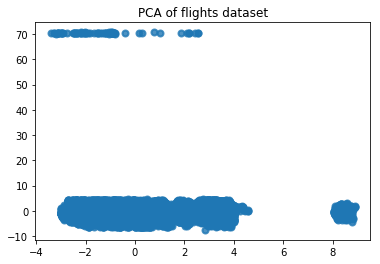

In [57]:
import matplotlib.pyplot as plt

print('explained variance ratio (first two components): %s' 
      % str(pca.explained_variance_ratio_))

plt.figure()
lw = 2

plt.scatter(X_r[:,0], X_r[:,1], alpha=.8, lw=lw)
plt.title('PCA of flights dataset')

## 8 构建分类器(Build a classifier)
我们来预测一个航班是否会晚点

In [61]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import linear_model, cross_validation, metrics, svm, ensemble
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support, accuracy_score
from sklearn.cross_validation import train_test_split, cross_val_score, ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [62]:
flights = pd.read_csv('data/nycflights13/flights.csv.gz')
weather = pd.read_csv('data/nycflights13/weather.csv.gz')
airports = pd.read_csv('data/nycflights13/airports.csv.gz')

df_withweather = pd.merge(flights, weather, how='left', on=['year', 'month', 'day', 'hour'])
df = pd.merge(df_withweather, airports, how='left', left_on='dest', right_on='faa')

df = df.dropna()

In [63]:
df

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,visib,time_hour_y,faa,name,lat,lon,alt,tz,dst,tzone
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,10.0,2013-01-01 01:00:00,ATL,Hartsfield Jackson Atlanta Intl,33.636719,-84.428067,1026.0,-5.0,A,America/New_York
5,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,10.0,2013-01-01 01:00:00,ATL,Hartsfield Jackson Atlanta Intl,33.636719,-84.428067,1026.0,-5.0,A,America/New_York
6,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,10.0,2013-01-01 01:00:00,ATL,Hartsfield Jackson Atlanta Intl,33.636719,-84.428067,1026.0,-5.0,A,America/New_York
8,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,...,10.0,2013-01-01 01:00:00,FLL,Fort Lauderdale Hollywood Intl,26.072583,-80.152750,9.0,-5.0,A,America/New_York
9,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,...,10.0,2013-01-01 01:00:00,FLL,Fort Lauderdale Hollywood Intl,26.072583,-80.152750,9.0,-5.0,A,America/New_York
10,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,...,10.0,2013-01-01 01:00:00,FLL,Fort Lauderdale Hollywood Intl,26.072583,-80.152750,9.0,-5.0,A,America/New_York
11,2013,1,1,557.0,600,-3.0,709.0,723,-14.0,EV,...,10.0,2013-01-01 01:00:00,IAD,Washington Dulles Intl,38.944533,-77.455811,313.0,-5.0,A,America/New_York
12,2013,1,1,557.0,600,-3.0,709.0,723,-14.0,EV,...,10.0,2013-01-01 01:00:00,IAD,Washington Dulles Intl,38.944533,-77.455811,313.0,-5.0,A,America/New_York
13,2013,1,1,557.0,600,-3.0,709.0,723,-14.0,EV,...,10.0,2013-01-01 01:00:00,IAD,Washington Dulles Intl,38.944533,-77.455811,313.0,-5.0,A,America/New_York
14,2013,1,1,557.0,600,-3.0,838.0,846,-8.0,B6,...,10.0,2013-01-01 01:00:00,MCO,Orlando Intl,28.429394,-81.308994,96.0,-5.0,A,America/New_York


In [64]:
pred = 'dep_delay'
features = ['month', 'day', 'dep_time', 'arr_time', 'carrier', 'dest', 'air_time',
           'distance', 'lat', 'lon', 'alt', 'dewp', 'humid', 'wind_speed', 'wind_gust',
           'precip', 'pressure', 'visib']
features_v = df[features]
pred_v = df[pred]

how_late_is_late = 15.0

pd.options.mode.chained_assignment = None #default='warn'


# 因为航空公司不是一个数字，我们把它转化为数字哑变量
features_v['carrier'] = pd.factorize(features_v['carrier'])[0]

# dest也不是一个数字，我们也把它转为数字
features_v['dest'] = pd.factorize(features_v['dest'])[0]

scaler = StandardScaler()
scaled_features_v = scaler.fit_transform(features_v)

features_train, features_test, pred_train, pred_test = train_test_split(
    scaled_features_v, pred_v, test_size=0.30, random_state=0)

In [66]:
# 使用logistic回归来执行分类

clf_lr = sklearn.linear_model.LogisticRegression(penalty='l2',
                                                class_weight='balanced')
logistic_fit = clf_lr.fit(features_train, np.where(pred_train >= how_late_is_late, 1, 0))

predictions = clf_lr.predict(features_test)

In [67]:
# summary Report

# Confusion Matrix
cm_lr = confusion_matrix(np.where(pred_test >= how_late_is_late, 1, 0),
                        predictions)
print("Confusion Matrix")
print(pd.DataFrame(cm_lr))

# 获取精确值
report_lr = precision_recall_fscore_support(
    list(np.where(pred_test >= how_late_is_late, 1, 0)),
    list(predictions), average='binary')

#打印精度值
print("\nprecision = %0.2f, recall = %0.2f, F1 = %0.2f, accuracy = %0.2f"
     % (report_lr[0], report_lr[1], report_lr[2],
       accuracy_score(list(np.where(pred_test >= how_late_is_late, 1, 0)),
                     list(predictions))))

Confusion Matrix
        0      1
0  135181  64481
1   17910  33883

precision = 0.34, recall = 0.65, F1 = 0.45, accuracy = 0.67


## 9 聚合数据(Cluster data)
最简单的聚类方法是K-Means

In [68]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.cluster import KMeans
from sklearn import linear_model, cross_validation, cluster
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support, accuracy_score
from sklearn.cross_validation import train_test_split, cross_val_score, ShuffleSplit
from sklearn.preprocessing import StandardScaler, OneHotEncoder

flights = pd.read_csv('data/nycflights13/flights.csv.gz')
weather = pd.read_csv('data/nycflights13/weather.csv.gz')
airports = pd.read_csv('data/nycflights13/airports.csv.gz')

df_withweather = pd.merge(flights, weather, how='left', on=['year', 'month', 'day', 'hour'])
df = pd.merge(df_withweather, airports, how='left', left_on='dest', right_on='faa')

df = df.dropna()

In [69]:
pred = 'dep_delay'
features = ['month', 'day', 'dep_time', 'arr_time', 'carrier', 'dest', 'air_time',
           'distance', 'lat', 'lon', 'alt', 'dewp', 'humid', 'wind_speed', 'wind_gust',
           'precip', 'pressure', 'visib']
features_v = df[features]
pred_v = df[pred]

how_late_is_late = 15.0

pd.options.mode.chained_assignment = None #default='warn'

# 因为航空公司不是一个数字，我们把它转化为数字哑变量
features_v['carrier'] = pd.factorize(features_v['carrier'])[0]

# dest也不是一个数字，我们也把它转为数字
features_v['dest'] = pd.factorize(features_v['dest'])[0]

scaler = StandardScaler()
scaled_features_v = scaler.fit_transform(features_v)

features_train, features_test, pred_train, pred_test = train_test_split(
    scaled_features_v, pred_v, test_size=0.30, random_state=0)

In [71]:
cluster = sklearn.cluster.KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', random_state=None, verbose=0)
cluster.fit(features_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [72]:
# 预测测试数据
result = cluster.predict(features_test)

In [73]:
result

array([7, 0, 7, ..., 7, 5, 0])

AttributeError: Unknown property extend

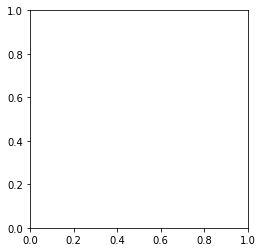

In [78]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(features_train)
kmeans = KMeans(init='k-means++', n_clusters=8, n_init=10)
kmeans.fit(reduced_data)

# mesh的步长
h = .02

x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

z = z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(z, interpolation='nearest',
          extend=(xx.min(), xx.max(), yy.min(), yy.max()),
          cmap=plt.cm.Paired
          #aspect='auto' 
          # origin='lower'
          )

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
           marker='x', s=169, linewidths=3,
           color='w', zorder=10)
plt.title('K-Means clustering on the dataset (PCA-reduced data)\n'
         'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

## 10 PySpark简介

扩展我们的算法：有时我们需要处理大量数据，并且采样已经无效，这个时候可以通过把数据分到多个机器来处理。

Spark是一个用来并行进行大数据处理的API。它将数据切割到集群来处理。在开发阶段，我们可以只在本地运行。

我们使用PySpark Shell来连接到集群。

运行下面路径的pyspark，会启动PySpark Shell

```
~/spark/bin/pyspark (Max/Linux)
C:\spark\bin\pyspark (Windows)
```

此时，可以在Shell中运行文件加载：

```
lines = sc.textFile("README.md")
lines.first() # 加载第一行
```

可以在`http://localhost:4040`查看PySpark运行的Job

大多数情况下，我们希望能够在Jupyter Notebook中运行PySpark，为此，我们需要设置环境变量：

```
PYSPARK_PYTHON=python3
PYSPARK_DRIVER_PYTHON="jupyter"
PYSPARK_DRIVER_PYTHON_OPTS="notebook"
```

然后运行`~/spark/bin/pyspark`，最后一个命令会启动一个jupyter server,样子跟我们用的一样。

In [1]:
lines = sc.text('README.md')
lines.take(5)

NameError: name 'sc' is not defined

我们看看http://localhost:4040 可以查看运行的Job

In [2]:
linesWithSpark = lines.filter(lambda line: 'spark' in line)
linesWithSpark.count()

NameError: name 'lines' is not defined

Spark的基本类型是RDD（resilient distributed dataset），它是基本分布式数据类型。RDD有两类操作，第一个是变换(transformation)，返回值仍然是RDD，另外一种是动作(action)，用来计算结果。Spark的操作是Lazy的，也就是说只有在执行action时才会真正的开始处理。